In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import math
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('suv_data.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
print("number of passengers in original dataset: " +str(len(data.index)))

number of passengers in original dataset: 400


# Data Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

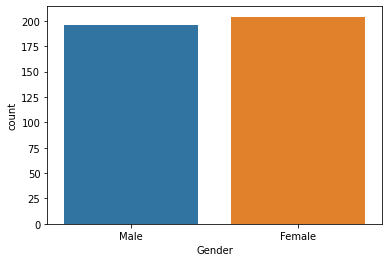

In [4]:
sns.countplot(x='Gender', data=data)

We can see that our dataset consists of more female buyers of the SUV than male buyers.

<AxesSubplot:xlabel='Gender', ylabel='count'>

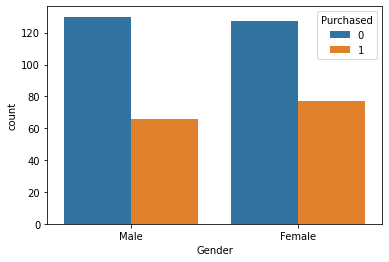

In [5]:
sns.countplot(x='Gender', hue='Purchased', data=data)

<AxesSubplot:>

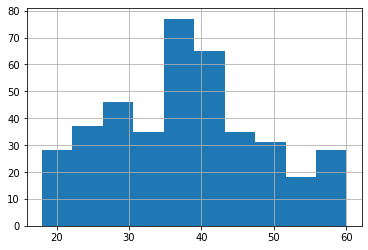

In [6]:
data['Age'].hist()

<AxesSubplot:>

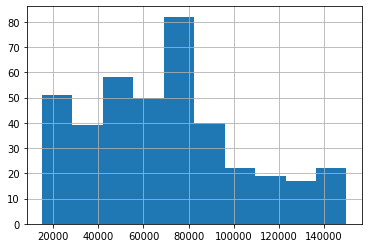

In [7]:
data['EstimatedSalary'].hist()

Text(0.5, 1.0, 'Purchase by age group')

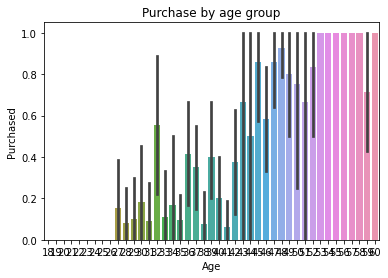

In [8]:
age_purchase = sns.barplot(data=data, x='Age', y='Purchased')
age_purchase.set_title('Purchase by age group')

<AxesSubplot:xlabel='Age', ylabel='Purchased'>

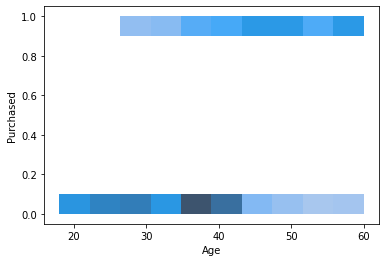

In [9]:
sns.histplot(data=data, x='Age', y='Purchased', bins=10, legend=True)

We see than the age group who but SUV's lie from 45-60

<AxesSubplot:xlabel='Age', ylabel='Count'>

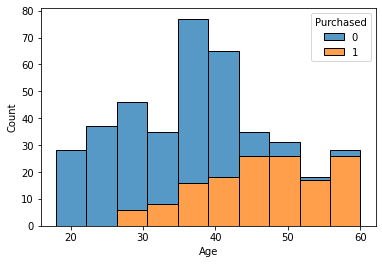

In [10]:
sns.histplot(data=data, x='Age', multiple='stack', hue='Purchased', bins=10, legend=True)

Here we obseve that greater the salary more likely is the user to buy the SUV.

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

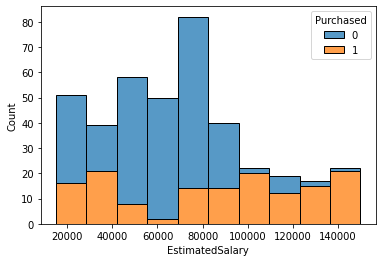

In [11]:
sns.histplot(data=data, x='EstimatedSalary', multiple='stack', hue='Purchased', bins=10, legend=True)

## Data Wrangling
We see that the data is clean and has no duplicates.

In [12]:
data.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [13]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [14]:
data.drop_duplicates()
data.shape

(400, 5)

In [15]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [16]:
#User id is unique and isn't required
df = data.drop('User ID', axis=1)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [17]:
gender = pd.get_dummies(df['Gender'], drop_first=True)
gender.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [18]:
data = pd.concat([df, gender], axis=1)
data.head()

,Gender,Age,EstimatedSalary,Purchased,Male
0,Male,19,19000,0,1
1,Male,35,20000,0,1
2,Female,26,43000,0,0
3,Female,27,57000,0,0
4,Male,19,76000,0,1


In [19]:
data = data.drop('Gender', axis=1)

### Train Data

In [20]:
X= data.drop('Purchased', axis=1)
y=data['Purchased']
X

,Age,EstimatedSalary,Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1
...,...,...,...
395,46,41000,0
396,51,23000,1
397,50,20000,0
398,36,33000,1


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

In [22]:
logmodel = LogisticRegression()

In [23]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [24]:
y_pred=logmodel.predict(X_test)

In [25]:
accuracy_score(y_test, y_pred)

0.6

Let us tweak the train-test size to see the change in accuracy

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
classifier = LogisticRegression(random_state=0)

In [29]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [30]:
y_predict=classifier.predict(X_test)

In [31]:
accuracy_score(y_test, y_predict)

0.9